In [1]:
# Name: Dhruv Kumar
# Roll No.: 24419CMP011
# Course: M.Sc. Computer Science
# Semester: 2nd

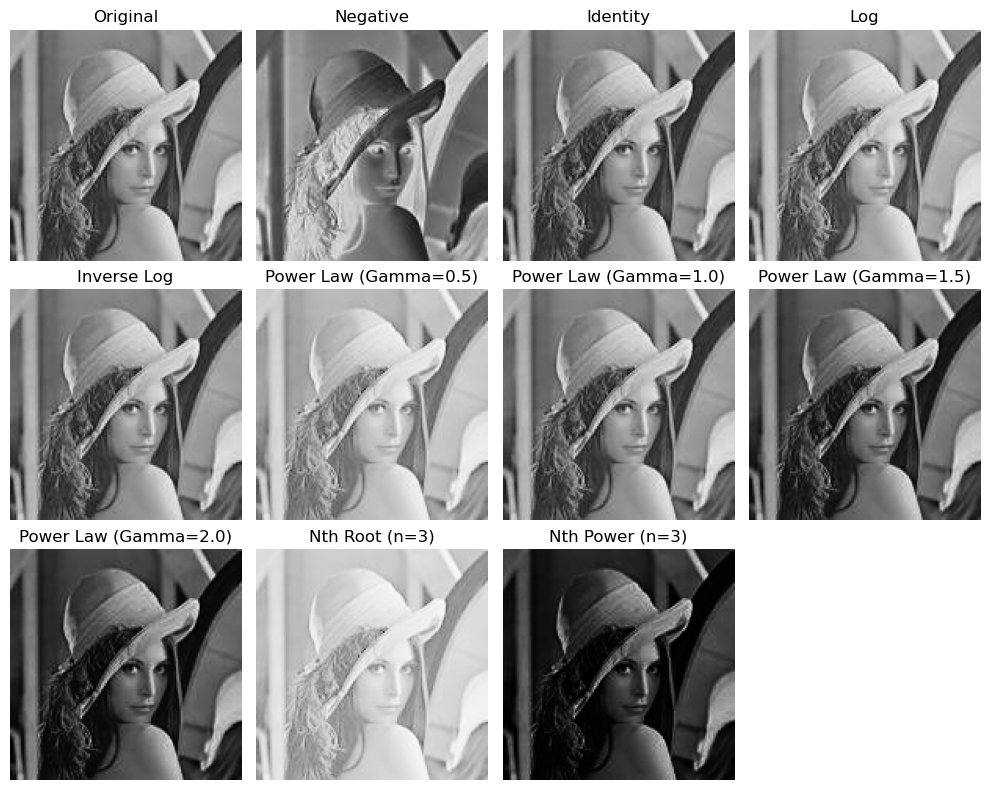

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image / 255.0

def negative_image(image):
    return 255 - image

def identity_image(image):
    return image

def log_image(image):
    c = 255 / np.log1p(np.max(image))
    return (c * np.log1p(image))

def inverse_log_image(image):
    c = 255 / np.log1p(np.max(image))
    return np.expm1(image / c)

def power_law_image(image, gamma):
    return (np.power(image, gamma) * 255)

def nth_root_image(image, n):
    return (np.power(image, 1.0 / n) * 255)

def nth_power_image(image, n):
    return (np.power(image, n) * 255)

def main():
    image = read_image('D:\\Code\\lenna.jpeg')
    
    transformations = {
        "Original": image,
        "Negative": negative_image(image),
        "Identity": identity_image(image),
        "Log": log_image(image),
        "Inverse Log": inverse_log_image(image),
        "Power Law (Gamma=0.5)": power_law_image(image, 0.5),
        "Power Law (Gamma=1.0)": power_law_image(image, 1.0),
        "Power Law (Gamma=1.5)": power_law_image(image, 1.5),
        "Power Law (Gamma=2.0)": power_law_image(image, 2.0),
        "Nth Root (n=3)": nth_root_image(image, 3),
        "Nth Power (n=3)": nth_power_image(image, 3)
    }
    
    plt.figure(figsize=(10, 8))
    i = 1
    for title in transformations:
        transformed_img = transformations[title]
        plt.subplot(3, 4, i)
        plt.imshow(transformed_img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        i += 1
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

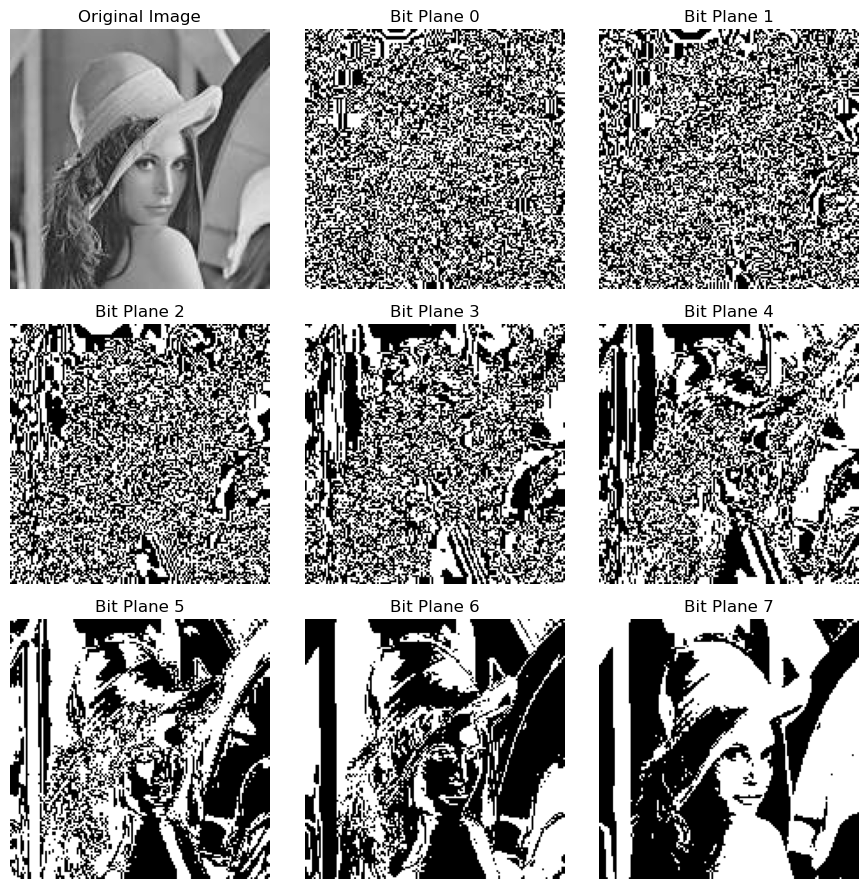

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bit_plane_slicing(image):
    bit_planes = []
    
    for i in range(8):
        bit_plane = (image >> i) & 1
        bit_planes.append(bit_plane)
    
    return bit_planes

def main():
    image = cv2.imread("D:\\Code\\lenna.jpeg", cv2.IMREAD_GRAYSCALE)
    
    # Perform bit-plane slicing
    bit_planes = bit_plane_slicing(image)
    
    plt.figure(figsize=(9, 9))
    
    plt.subplot(3, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    for i in range(8):
        plt.subplot(3, 3, i + 2)
        plt.imshow(bit_planes[i], cmap='gray')
        plt.title(f"Bit Plane {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Original Message (first 100 bits): 1001010000010001111111101101001000010110110000110000011111100111101001011001101001001011111101100000
Extracted Message (first 100 bits): 1001010000010001111111101101001000010110110000110000011111100111101001011001101001001011111101100000


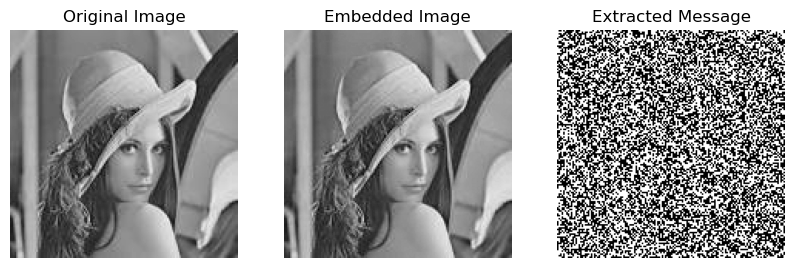

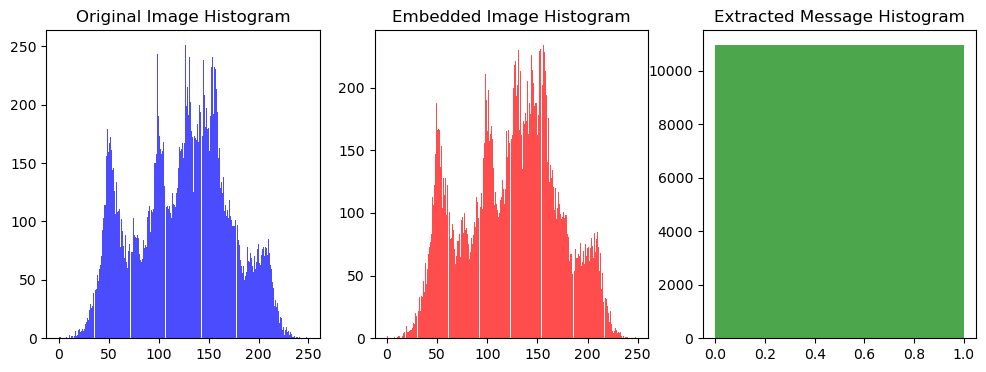

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_secret_message(image):
    M, N = image.shape
    secret_message = np.random.choice([0, 1], size=(M, N))
    return secret_message

def embed_message(image, secret_message):
    embedded_image = image.copy()
    M, N = image.shape
    for i in range(M):
        for j in range(N):
            embedded_image[i, j] = (image[i, j] & 0b11111110) | secret_message[i, j]
    return embedded_image

def extract_message(embedded_image):
    M, N = embedded_image.shape
    extracted_message = np.zeros((M, N), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            extracted_message[i, j] = embedded_image[i, j] & 1
    return extracted_message

def plot_histograms(original, embedded, extracted):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(original.flatten(), bins=256, color='blue', alpha=0.7)
    plt.title("Original Image Histogram")

    plt.subplot(1, 3, 2)
    plt.hist(embedded.flatten(), bins=256, color='red', alpha=0.7)
    plt.title("Embedded Image Histogram")

    plt.subplot(1, 3, 3)
    plt.hist(extracted.flatten(), bins=2, color='green', alpha=0.7)
    plt.title("Extracted Message Histogram")

    plt.show()

def message_to_binary(message):
    binary_str = ""
    for row in message:
        for bit in row:
            # ensure we get '0' or '1'
            binary_str += str(int(bit))
    return binary_str
def main():
    image = cv2.imread("D:\\Code\\lenna.jpeg", cv2.IMREAD_GRAYSCALE)

    secret_message = generate_secret_message(image)
    embedded_image = embed_message(image, secret_message)
    extracted_message = extract_message(embedded_image)

    original_message_str = message_to_binary(secret_message)
    extracted_message_str = message_to_binary(extracted_message)

    print("Original Message (first 100 bits):", original_message_str[:100])
    print("Extracted Message (first 100 bits):", extracted_message_str[:100])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(embedded_image, cmap='gray')
    plt.title("Embedded Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(extracted_message, cmap='gray')
    plt.title("Extracted Message")
    plt.axis('off')

    plt.show()
    plot_histograms(image, embedded_image, extracted_message)

if __name__ == "__main__":
    main()

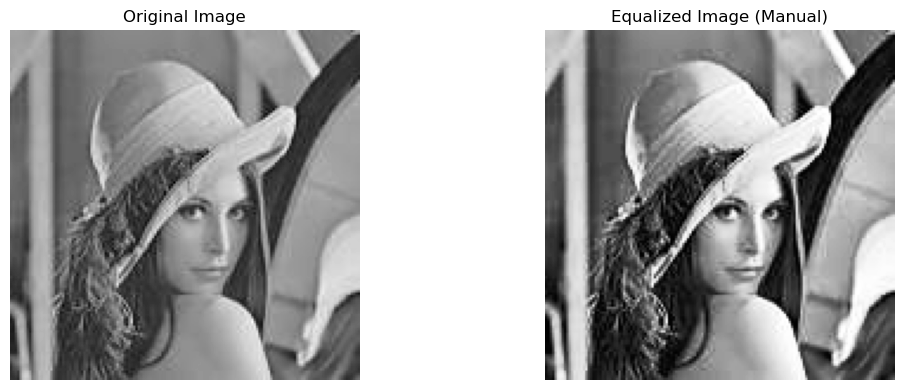

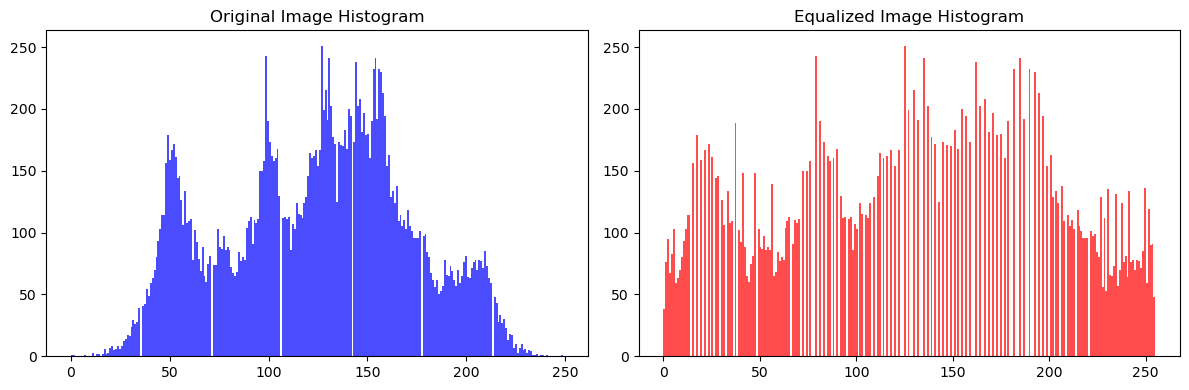

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_histogram_equalization(image):
    rows, cols = image.shape

    # Step 1: Compute histogram manually
    hist = [0] * 256
    for i in range(rows):
        for j in range(cols):
            hist[image[i][j]] += 1

    # Step 2: Compute PDF
    num_pixels = rows * cols
    pdf = [h / num_pixels for h in hist]

    # Step 3: Compute CDF manually
    cdf = [0] * 256
    c = 0
    for i in range(256):
        c += pdf[i]
        cdf[i] = c

    # Step 4: Equalization mapping
    equalization_map = [round(c * 255) for c in cdf]

    # Step 5: Apply mapping to image
    equalized_image = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            equalized_image[i][j] = equalization_map[image[i][j]]

    return equalized_image

def plot_histograms(original, equalized):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(original.flatten(), bins=256, color='blue', alpha=0.7)
    plt.title("Original Image Histogram")

    plt.subplot(1, 2, 2)
    plt.hist(equalized.flatten(), bins=256, color='red', alpha=0.7)
    plt.title("Equalized Image Histogram")

    plt.tight_layout()
    plt.show()

def main():
    image = cv2.imread("D:\\Code\\lenna.jpeg", cv2.IMREAD_GRAYSCALE)
    equalized_image = manual_histogram_equalization(image)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Equalized Image (Manual)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    plot_histograms(image, equalized_image)

if __name__ == "__main__":
    main()
